In [5]:
#!pip install -r requirements.txt

In [6]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV  
import warnings

In [7]:
warnings.filterwarnings("ignore")

In [8]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Functions that I'll use in this notebook

In [9]:
from myfunctions import * 

## Read the dataset

In [10]:
DATASET_PATH = "../data/beer_profile_and_ratings.csv"

In [11]:
print(os.path.exists(DATASET_PATH))

True


In [12]:
#save_fraction_csv(DATASET_PATH, "../data", "new_input.csv", 0.1)

In [13]:
ds = pd.read_csv(DATASET_PATH)

In [14]:
ds.shape

(2878, 25)

In [15]:
ds.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Mai Bock,Bock - Maibock,Sprecher Brewing Company,Sprecher Brewing Company Mai Bock,Notes:2004 and 1988 Bronze Medal Winner in the...,6.0,20,38,36,59,14,39,71,20,0,23,68,17,107,3.720183,3.834862,3.788991,3.715596,3.857798,109
1,Maibock,Bock - Maibock,Gordon Biersch Brewery Restaurant,Gordon Biersch Brewery Restaurant Gordon Biers...,Notes:,7.3,20,38,15,38,18,31,88,27,1,23,38,8,92,3.337209,3.604651,3.406977,3.476744,3.430233,43
2,Hacker-Pschorr Hubertus Bock,Bock - Maibock,Hacker-Pschorr Bräu GmbH,Hacker-Pschorr Bräu GmbH Hacker-Pschorr Hubert...,Notes:,6.8,20,38,26,42,27,42,58,32,3,37,63,11,114,3.642857,3.892857,3.785714,3.750000,3.857143,14
3,Bucking Bock,Bock - Maibock,Rahr & Sons Brewing Company,Rahr & Sons Brewing Company Bucking Bock,Notes:,7.5,20,38,20,24,21,49,37,30,0,29,58,12,65,3.333333,3.396825,3.420635,3.476190,3.587302,63
4,The Gift (WinterBock Lager),Bock - Maibock,Starr Hill Brewery,Starr Hill Brewery The Gift (WinterBock Lager),Notes:,6.5,20,38,15,32,16,16,65,20,0,20,17,9,62,3.607843,3.647059,3.813725,3.764706,3.872549,51


"Style" - "Стиль"  

"Brewery" - "Пивоварня"  

"Beer Name (Full)" - "Назва пива (повна)"
  
"Description" - "Опис"  

"ABV" - "Вміст алкоголю"  

"Min IBU" - "Мінімальний IBU" 

(IBU (International Bitterness Units scale) – міжнародна одиниця гіркоти пива) 

"Max IBU" - "Максимальний IBU"  

"Astringency" - "Терпкість"  

"Body" - "Тіло"  

"Alcohol" - "Алкоголь"  

"Bitter" - "Гіркий"  

"Sweet" - "Солодкий"  

"Sour" - "Кислий"  

"Salty" - "Солоний"  

"Fruits" - "Фруктовий"  

"Hoppy" - "Хмільний"  

"Spices" - "Пряний"  

"Malty" - "Солодовий"


<hr>

#### Types

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2878 non-null   object 
 1   Style              2878 non-null   object 
 2   Brewery            2878 non-null   object 
 3   Beer Name (Full)   2878 non-null   object 
 4   Description        2878 non-null   object 
 5   ABV                2878 non-null   float64
 6   Min IBU            2878 non-null   int64  
 7   Max IBU            2878 non-null   int64  
 8   Astringency        2878 non-null   int64  
 9   Body               2878 non-null   int64  
 10  Alcohol            2878 non-null   int64  
 11  Bitter             2878 non-null   int64  
 12  Sweet              2878 non-null   int64  
 13  Sour               2878 non-null   int64  
 14  Salty              2878 non-null   int64  
 15  Fruits             2878 non-null   int64  
 16  Hoppy              2878 

Top 6 beer styles by the amount in dataset:


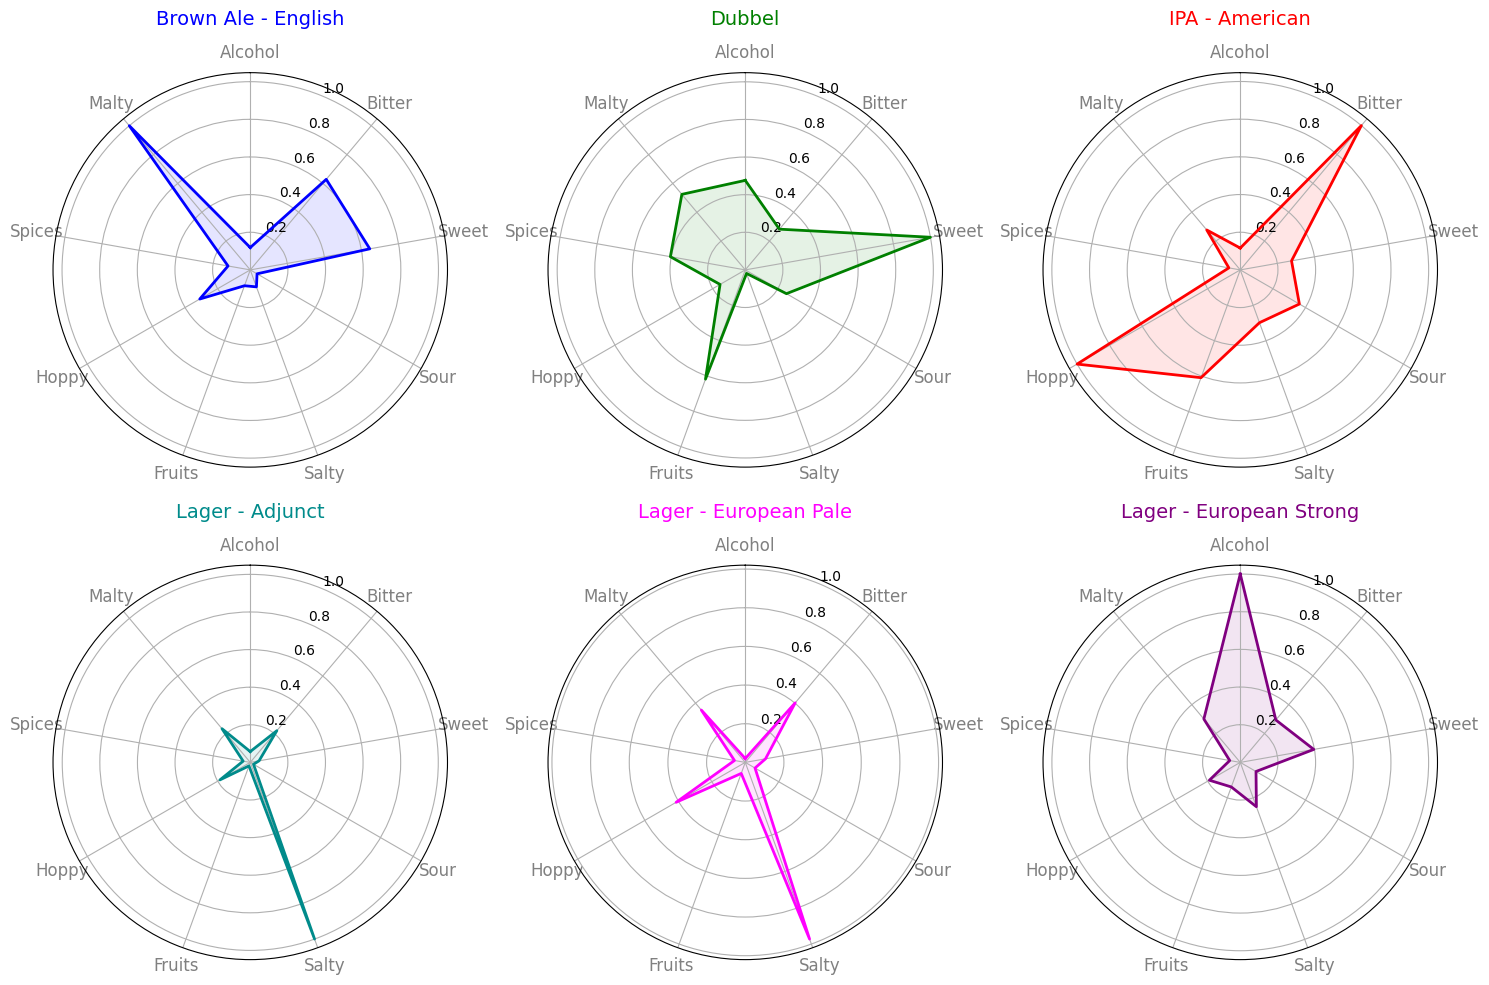

In [17]:
top_num = 6
print(f"Top {top_num} beer styles by the amount in dataset:")
plot_radar_chart(ds,'Style', ['Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty'], 15)

In [18]:
ds.sort_values('review_overall', ascending=False).head(10)    


,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
1356,Lambik (2 Year Old Unblended),Lambic - Traditional,Brouwerij Girardin,Brouwerij Girardin Lambik (2 Year Old Unblended),Notes:,5.0,0,10,18,10,2,12,21,48,0,24,15,2,9,4.500000,4.625000,4.750000,4.875000,5.000000,4
2819,Sang Noir,Wild Ale,Cascade Brewing / Raccoon Lodge & Brewpub,Cascade Brewing / Raccoon Lodge & Brewpub Casc...,Notes:Sang Noir is a blend of imperial spiced ...,9.3,5,30,16,30,38,1,47,98,0,72,3,19,47,4.538462,4.307692,4.423077,4.923077,4.807692,13
1334,De Troch Oude Gueuze,Lambic - Gueuze,Brouwerij De Troch,Brouwerij De Troch De Troch Gueuze,Notes:,5.5,0,10,51,23,5,14,49,200,7,96,8,14,30,4.750000,4.250000,4.250000,4.750000,4.750000,2
445,Helios Goya Dry,Happoshu,"Helios Distillery Co., Ltd.","Helios Distillery Co., Ltd. Helios Goya Dry",Notes:,5.0,0,0,6,7,3,13,8,6,0,6,14,5,7,4.250000,4.000000,4.250000,4.250000,4.750000,2
1290,Framboos,Lambic - Fruit,Brouwerij Drie Fonteinen,Brouwerij Drie Fonteinen Drie Fonteinen Framboos,Notes:Recent bottling dates:05/25/199905/31/20...,5.0,15,21,26,20,4,4,97,95,0,94,8,0,8,4.700000,4.500000,4.500000,4.750000,4.700000,10
1984,Roggenbier,Rye Beer - Roggenbier,Beaver Brewing Company,Beaver Brewing Company Roggenator,Notes:,4.6,10,20,8,23,7,2,37,39,0,37,4,16,51,4.333333,4.666667,4.666667,4.666667,4.666667,3
1023,Mönchsambacher Lager,Lager - Kellerbier / Zwickelbier,Brauerei Zehendner GmbH,Brauerei Zehendner GmbH Mönchsambacher Lager,Notes:,5.5,20,40,35,39,5,53,37,38,1,38,77,20,63,4.230769,4.288462,4.384615,4.384615,4.634615,26
1287,Blåbær Lambik,Lambic - Fruit,Brasserie Cantillon,Brasserie Cantillon Cantillon Blåbær Lambik,Notes:Made in cooperation with Jeppe from Olbu...,5.0,15,21,30,25,6,5,99,119,0,113,12,0,8,4.528846,4.644231,4.493590,4.628205,4.628205,156
640,Heady Topper,IPA - New England,The Alchemist,The Alchemist Heady Topper,Notes:Heddy Topper is an American Double India...,8.0,50,70,16,42,18,91,40,55,0,76,117,2,30,4.660981,4.163113,4.405117,4.608742,4.625800,469
1858,Trappist Westvleteren 12 (XII)Brouwerij Westvl...,Quadrupel (Quad),Brouwerij Westvleteren (Sint-Sixtusabdij van W...,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,"Notes:The heaviest of the Westvleteren beers, ...",10.2,25,50,5,44,49,14,86,21,0,53,5,12,57,4.583333,4.454009,4.633255,4.718553,4.617925,1272


<hr>

## Data engineering

In [14]:
print_unique(ds)

Name                 2758
Style                 101
Brewery               893
Beer Name (Full)     2878
Description          1657
ABV                   183
Min IBU                19
Max IBU                24
Astringency            66
Body                  149
Alcohol               104
Bitter                132
Sweet                 176
Sour                  192
Salty                  21
Fruits                149
Hoppy                 149
Spices                138
Malty                 193
review_aroma         2114
review_appearance    2055
review_palate        2108
review_taste         2146
review_overall       2108
number_of_reviews     781
dtype: int64


In [15]:
ds[ds['number_of_reviews'] >= 10].shape

(2443, 25)

In [16]:
# select only beers with at least 10 reviews
ds = ds[ds['number_of_reviews']>=10]

In [17]:
cols2drop = ['Description', 'Name', 'Beer Name (Full)', 'Min IBU', 'Max IBU', 'number_of_reviews', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'Alcohol', 'Body', 'Bitter', 'Fruits', 'Brewery']

In [18]:
for col in cols2drop:
    drop_column(ds, col)

In [19]:
save_del_cols(cols2drop)

In [20]:
print(f"Number of duplicate rows : {ds.duplicated().sum()}")
ds.drop_duplicates(inplace=True)

Number of duplicate rows : 0


In [21]:
print_nans(ds)

There is no missing data, so no need for data imputation

<hr>

#### Descriptive Statistics


In [23]:
ds.describe(include='O') # for categorical variables

,Style
count,2443
unique,101
top,Lager - Adjunct
freq,43


In [24]:
ds.describe(exclude='O') # for numerical variables

,ABV,Astringency,Sweet,Sour,Salty,Hoppy,Spices,Malty,review_overall
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,6.516476,17.357757,60.048301,35.054851,1.060991,41.620549,19.586983,77.631600,3.743821
std,2.218360,10.404696,32.552964,37.581321,2.253572,29.650967,24.833601,38.215757,0.436211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.136364
25%,5.000000,10.000000,36.000000,11.000000,0.000000,19.000000,5.000000,48.000000,3.575758
50%,6.000000,15.000000,55.000000,23.000000,0.000000,34.000000,11.000000,74.000000,3.833333
75%,7.600000,22.000000,77.000000,44.000000,1.000000,56.000000,25.000000,103.000000,4.028312
max,28.000000,81.000000,263.000000,284.000000,48.000000,172.000000,184.000000,239.000000,4.807692


<hr>

#### Categorical encoding

In [25]:
cat_columns = [
"Style"
]

In [26]:
map_dicts = dict()
for column in cat_columns:
    ds[column] = ds[column].astype('category')
    map_dicts[column] = dict(zip(ds[column], ds[column].cat.codes))
    ds[column] = ds[column].cat.codes

In [27]:
save_categorical_encoding(map_dicts)

In [28]:
display(ds.sample(10))

,Style,ABV,Astringency,Sweet,Sour,Salty,Hoppy,Spices,Malty,review_overall
2362,84,7.5,8,122,17,2,52,6,128,3.322222
117,5,6.0,21,60,29,0,64,0,82,3.666667
418,16,5.0,35,93,67,2,67,10,58,3.605178
421,16,8.0,21,71,75,1,131,66,36,4.013889
1647,58,7.2,37,38,44,0,100,9,82,3.464286
1035,38,3.5,21,21,11,4,65,6,71,2.719355
2803,98,4.8,23,12,46,1,29,14,36,3.563158
622,23,7.5,15,26,31,1,84,4,22,4.119318
1674,59,5.0,5,52,3,0,36,14,112,3.883333
1829,65,5.7,4,22,12,0,13,39,27,3.670792


<hr>

#### Analyse correlations

In [29]:
ds.corr()  

,Style,ABV,Astringency,Sweet,Sour,Salty,Hoppy,Spices,Malty,review_overall
Style,1.000000,0.179365,-0.088112,0.071104,0.049504,-0.038694,-0.191642,0.150615,0.119347,0.199327
ABV,0.179365,1.000000,-0.210177,0.473266,0.109908,-0.141391,-0.064473,0.211959,0.120596,0.276538
Astringency,-0.088112,-0.210177,1.000000,-0.110862,0.557928,0.345720,0.267790,-0.129523,-0.206874,0.156134
Sweet,0.071104,0.473266,-0.110862,1.000000,0.229634,-0.175768,-0.155668,0.071765,0.361672,0.203592
Sour,0.049504,0.109908,0.557928,0.229634,1.000000,0.073223,0.004207,-0.018476,-0.417826,0.221193
Salty,-0.038694,-0.141391,0.345720,-0.175768,0.073223,1.000000,0.166934,-0.045458,-0.061495,-0.025859
Hoppy,-0.191642,-0.064473,0.267790,-0.155668,0.004207,0.166934,1.000000,-0.169417,0.103819,0.177581
Spices,0.150615,0.211959,-0.129523,0.071765,-0.018476,-0.045458,-0.169417,1.000000,0.010345,0.139168
Malty,0.119347,0.120596,-0.206874,0.361672,-0.417826,-0.061495,0.103819,0.010345,1.000000,0.203480
review_overall,0.199327,0.276538,0.156134,0.203592,0.221193,-0.025859,0.177581,0.139168,0.203480,1.000000


In [30]:
show_high_correlations(ds,0.5)

Correlations ( > 0.5 ) inside dataset:  
Astringency -> Sour: 0.5579278249451023


<hr>

#### Outlier Engineering


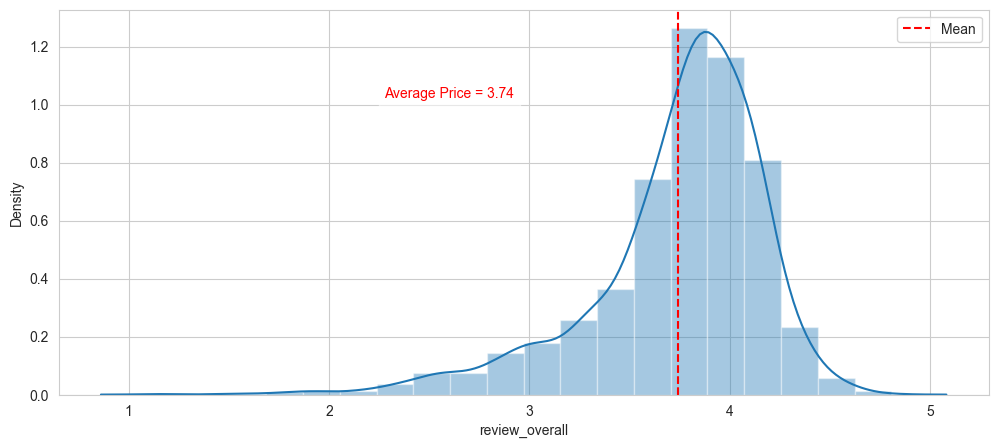

In [31]:
plot_attribute_density(ds, 'review_overall')

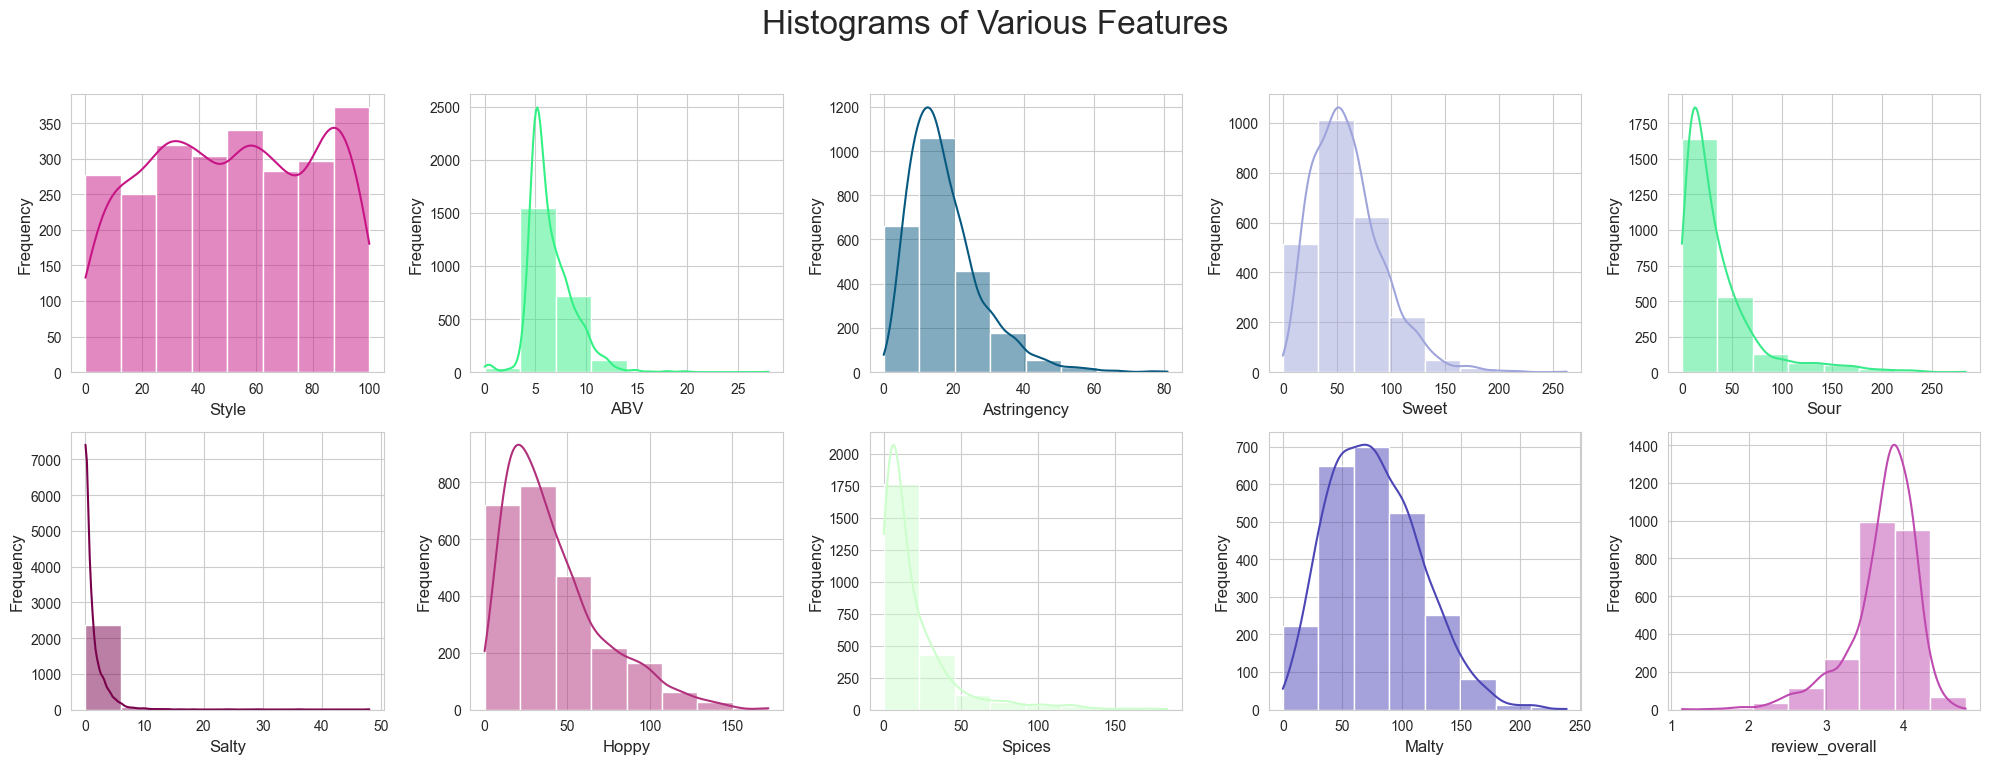

In [32]:
plot_attrs_frequency(ds, ds.columns)

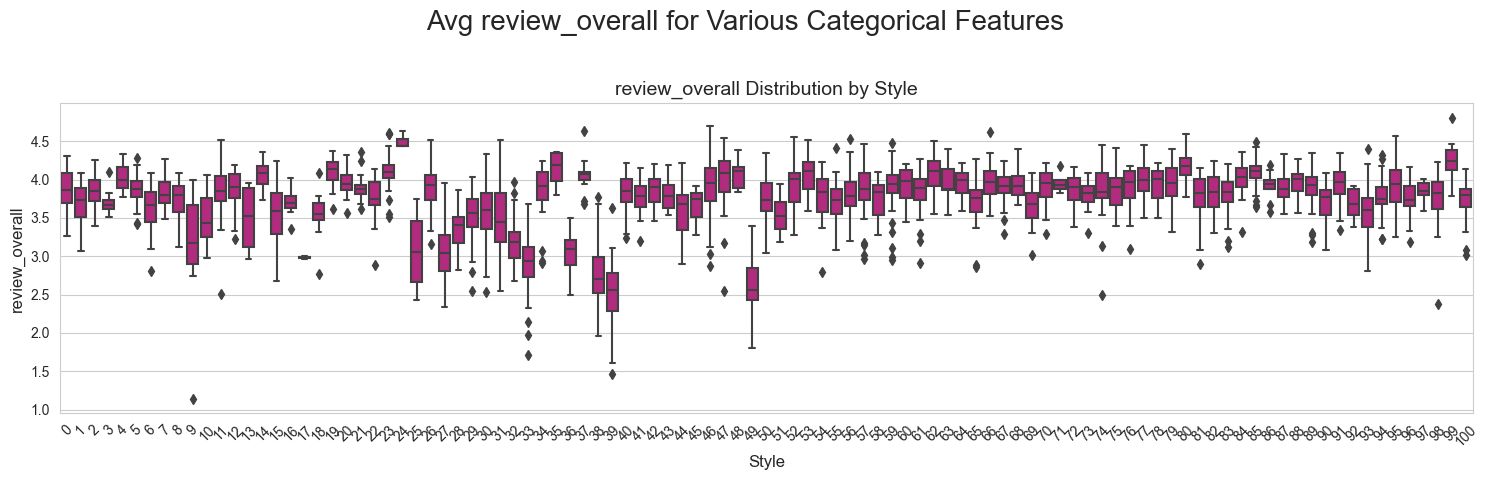

In [33]:
plot_attr_distr_by_catcols(ds, 'review_overall', ['Style'])

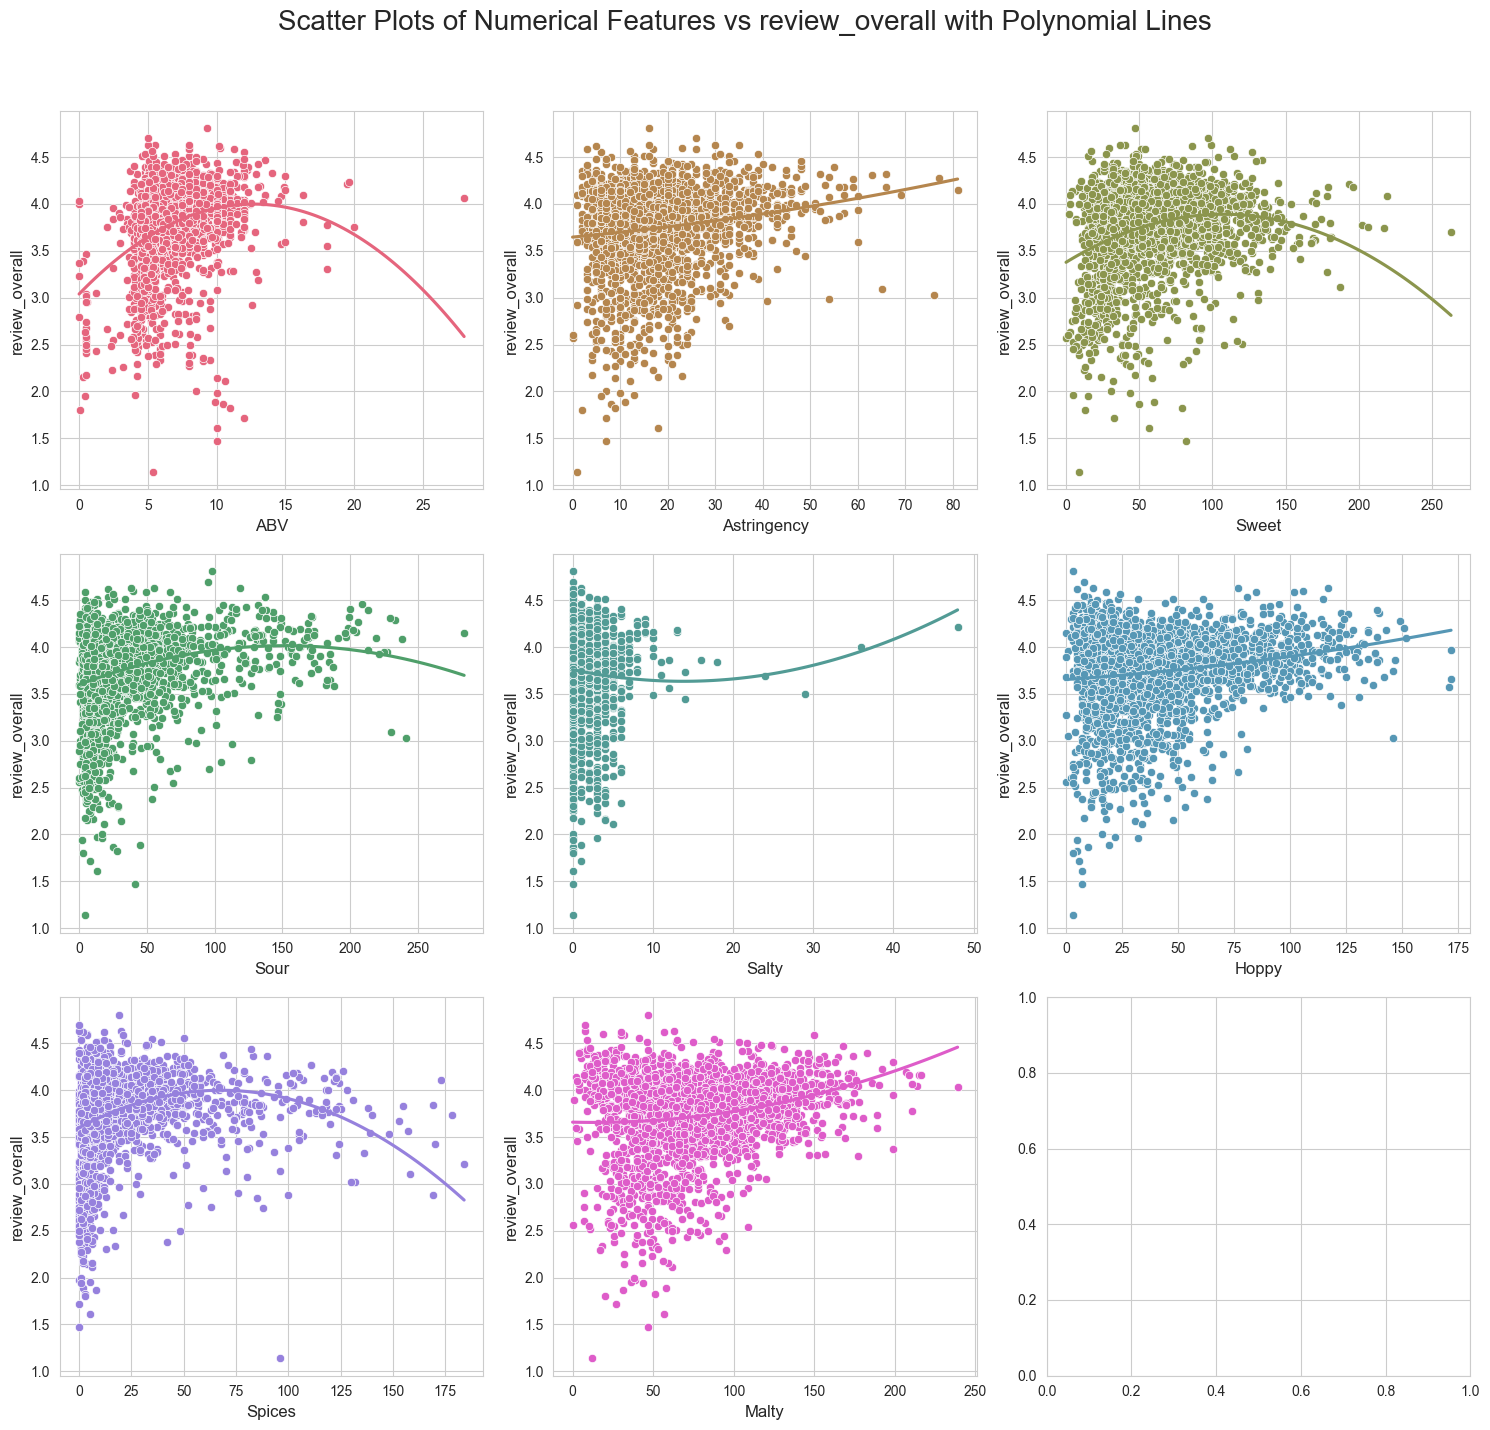

In [34]:
numerical_cols = ds.select_dtypes(include=['float64', 'int64']).columns
selected_cols = [col for col in numerical_cols if col not in ['review_overall']]
plot_attr_polym_line_vs_num_feature(ds, 'review_overall', selected_cols)

In [35]:
ds.describe(exclude='O')

,Style,ABV,Astringency,Sweet,Sour,Salty,Hoppy,Spices,Malty,review_overall
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,51.957020,6.516476,17.357757,60.048301,35.054851,1.060991,41.620549,19.586983,77.631600,3.743821
std,28.973133,2.218360,10.404696,32.552964,37.581321,2.253572,29.650967,24.833601,38.215757,0.436211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.136364
25%,28.000000,5.000000,10.000000,36.000000,11.000000,0.000000,19.000000,5.000000,48.000000,3.575758
50%,53.000000,6.000000,15.000000,55.000000,23.000000,0.000000,34.000000,11.000000,74.000000,3.833333
75%,79.000000,7.600000,22.000000,77.000000,44.000000,1.000000,56.000000,25.000000,103.000000,4.028312
max,100.000000,28.000000,81.000000,263.000000,284.000000,48.000000,172.000000,184.000000,239.000000,4.807692


In [36]:
outlier_columns = ['Sweet', 'Sour', 'Hoppy', 'Spices', 'Malty']

In [37]:
threshold = 4

In [38]:
ds_new = ds[(np.abs(stats.zscore(ds[outlier_columns])) < threshold).all(axis=1)]
ds_new.describe(exclude='O')

,Style,ABV,Astringency,Sweet,Sour,Salty,Hoppy,Spices,Malty,review_overall
count,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000
mean,51.841196,6.502717,17.072452,59.505476,33.437658,1.051811,41.993260,17.981045,78.029907,3.740982
std,28.924675,2.226140,9.739367,31.480811,33.201223,2.260773,29.395109,20.498447,37.833539,0.437567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.136364
25%,28.000000,5.000000,10.000000,36.000000,11.000000,0.000000,20.000000,5.000000,49.000000,3.575000
50%,53.000000,5.900000,15.000000,55.000000,23.000000,0.000000,34.000000,11.000000,75.000000,3.832650
75%,79.000000,7.500000,22.000000,77.000000,43.000000,1.000000,56.000000,24.000000,103.000000,4.025987
max,100.000000,28.000000,77.000000,187.000000,185.000000,48.000000,152.000000,118.000000,216.000000,4.807692


In [39]:
ds_new.shape

(2374, 10)

In [40]:
outlier_params = {  
    'columns': outlier_columns,  
    'threshold': threshold 
}  
save_outliers(outlier_params)  

In [41]:
ds = ds_new

<hr>

#### Normalisation

In [42]:
# set up the scaler
scaler = MinMaxScaler()
# Specify the columns to scale (all columns except 'class')  
columns_to_scale = [col for col in ds.columns if col != 'review_overall']  
columns_to_scale

['Style',
 'ABV',
 'Astringency',
 'Sweet',
 'Sour',
 'Salty',
 'Hoppy',
 'Spices',
 'Malty']

In [43]:
# Fit the scaler to the train set, it will learn the parameters  
scaler.fit(ds[columns_to_scale])  

MinMaxScaler()

In [44]:
save_scaler(scaler)

In [45]:
# Transform train and test sets  
ds_scaled = scaler.transform(ds[columns_to_scale]) 

In [46]:
# Create a new DataFrame with the scaled data  
df_scaled = pd.DataFrame(ds_scaled, columns=columns_to_scale)    

In [47]:
# Copy the 'class' column from the original DataFrame  
df_scaled['review_overall'] = ds['review_overall'].values  
ds = df_scaled
# Now df_scaled is a DataFrame with all columns scaled except 'class'  
np.round(ds.describe(), 1)

,Style,ABV,Astringency,Sweet,Sour,Salty,Hoppy,Spices,Malty,review_overall
count,2374.0,2374.0,2374.0,2374.0,2374.0,2374.0,2374.0,2374.0,2374.0,2374.0
mean,0.5,0.2,0.2,0.3,0.2,0.0,0.3,0.2,0.4,3.7
std,0.3,0.1,0.1,0.2,0.2,0.0,0.2,0.2,0.2,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
25%,0.3,0.2,0.1,0.2,0.1,0.0,0.1,0.0,0.2,3.6
50%,0.5,0.2,0.2,0.3,0.1,0.0,0.2,0.1,0.3,3.8
75%,0.8,0.3,0.3,0.4,0.2,0.0,0.4,0.2,0.5,4.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.8


In [62]:
ds.head()

,Style,ABV,Astringency,Sweet,Sour,Salty,Hoppy,Spices,Malty,review_overall
0,0.0,0.214286,0.467532,0.379679,0.108108,0.000000,0.447368,0.144068,0.495370,3.857798
1,0.0,0.260714,0.194805,0.470588,0.145946,0.020833,0.250000,0.067797,0.425926,3.430233
2,0.0,0.242857,0.337662,0.310160,0.172973,0.062500,0.414474,0.093220,0.527778,3.857143
3,0.0,0.267857,0.259740,0.197861,0.162162,0.000000,0.381579,0.101695,0.300926,3.587302
4,0.0,0.232143,0.194805,0.347594,0.108108,0.000000,0.111842,0.076271,0.287037,3.872549


<hr>

# Modelling

In [48]:
import time
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from catboost import CatBoostRegressor

In [49]:
# Let's predict  stem height
y_column = ds.columns[-1]
X_columns = ds.columns[:-1]

print("Target variable: " + str(y_column))
print("Features: " + str(X_columns))

Target variable: review_overall
Features: Index(['Style', 'ABV', 'Astringency', 'Sweet', 'Sour', 'Salty', 'Hoppy',
       'Spices', 'Malty'],
      dtype='object')


In [50]:
X = ds[X_columns]
y = ds[y_column]

<hr>

#### Random permutations cross-validation
The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [52]:
models = [ LinearRegression(), 
           LGBMRegressor(),
           SGDRegressor(),
           RandomForestRegressor(),
           ElasticNet(),
           BayesianRidge(),
           GradientBoostingRegressor(),
           SVR(),
           DecisionTreeRegressor(),
           Ridge(random_state = 30), 
           Lasso(random_state = 30),
           KNeighborsRegressor(),
           RandomForestRegressor(random_state = 30),
           xgb.XGBRegressor(random_state = 30),
           DecisionTreeRegressor(random_state = 30),
           CatBoostRegressor()
]

#### Baseline scores

In [53]:
# Baseline scores (assuming the same prediction for all data samples)
rmse_bs_train = mean_squared_error(y_train, [np.mean(y_train)]*len(y_train), squared=False)
rmse_bs_test = mean_squared_error(y_test, [np.mean(y_train)]*len(y_test), squared=False)
print(f"RMSE baseline score for train {round(rmse_bs_train,3)}, and for test {round(rmse_bs_test,3)}")

RMSE baseline score for train 0.435, and for test 0.449


In [3]:
model = test_regression_models(X_train, y_train, X_test, y_test, models, metric=mean_squared_error)

print("\nBest estimated model: " + str(model))

<hr>

#### Hyperparameter Tuning
Now we will be performing the tuning of hyperparameters of the CatBoostRegressor model. 


In [4]:
from sklearn.model_selection import RandomizedSearchCV  
from catboost import CatBoostRegressor  
from sklearn.model_selection import ShuffleSplit  

  
# Define the hyperparameter configuration space  
params = {  
    'depth': [3, 4, 5, 6, 7, 8, 9, 10],  
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],  
    'iterations': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],  
    'l2_leaf_reg': [0.5, 1, 2, 3, 5, 7, 9, 11, 13, 15],  
    'border_count': [32, 64, 128, 254],  
    'thread_count': [4],  
} 
# Initialize the CatBoost Regressor  
regressor = CatBoostRegressor()  
# Create a ShuffleSplit object  
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=30)  
# Initialize the Random Search  
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=params, cv=ss, n_jobs=-1, return_train_score=True)  
# Fit the random search model  
random_search.fit(X, y)
  
# Print The value of best hyperparameters  
print("\nThe best parameters are %s with a score of %0.2f"
      % (random_search.best_params_, random_search.best_score_))

<hr>

#### Random permutations cross-validation
The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

In [56]:
ss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=30)  
train_index, test_index = next(ss.split(X))  
  
regressor = CatBoostRegressor(thread_count=4,   
                              border_count=254,   
                              learning_rate=0.05,   
                              l2_leaf_reg=2,   
                              iterations=900,   
                              depth=8,  
                              verbose=False)  # set verbose to False to suppress iteration results  
  
regressor.fit(X.iloc[train_index], y.iloc[train_index])  
y_pred = regressor.predict(X.iloc[test_index])  
  
print('\nFINAL\nShuffleSplit set MSE metric: \n', metrics.mean_squared_error(y.iloc[test_index], y_pred)) 


FINAL
ShuffleSplit set MSE metric: 
 0.07848762226457519


In [57]:
save_model(regressor, '../models', 'catBoostRegr.joblib')
print(str(regressor) + " was saved at models/ as catBoostRegr.joblib")

<catboost.core.CatBoostRegressor object at 0x16a9ef6a0> was saved at models/ as catBoostRegr.joblib


<hr>

#### Feature importances

In [58]:
# we can use Random forest classifier
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Style (21.474220)
2. ABV (13.091903)
3. Malty (11.288459)
4. Hoppy (11.091406)
5. Sour (10.529882)
6. Spices (10.389131)
7. Astringency (9.327877)
8. Sweet (8.026606)
9. Salty (4.780517)


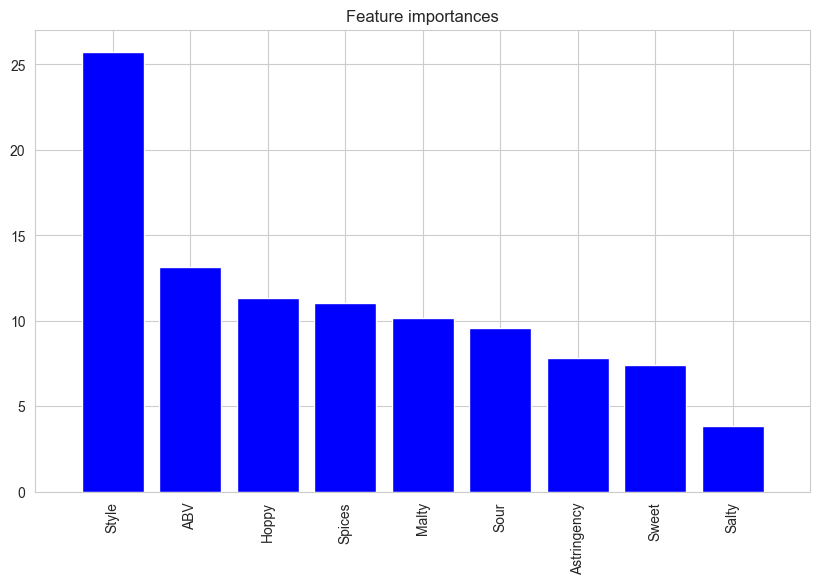

In [63]:
plot_feature_importances(model, X_columns)

Permutation importance is a technique used in machine learning to measure the feature importance. It helps to understand the contribution of each feature towards the predictive power of a model.

The concept is simple:
- Train a model.
- Shuffle the values in a single column (i.e., a feature), making this column no longer meaningful.
- Measure how much the model's performance decreases after the shuffling.

The idea is that the importance of a feature is determined by how much the model's performance decreases when the feature's information is destroyed

In [60]:
imps = permutation_importance(model, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Style (0.309088)
2. ABV (0.147933)
3. Hoppy (0.113505)
4. Spices (0.103038)
5. Malty (0.096668)
6. Sour (0.067508)
7. Astringency (0.058080)
8. Sweet (0.044369)
9. Salty (0.000988)


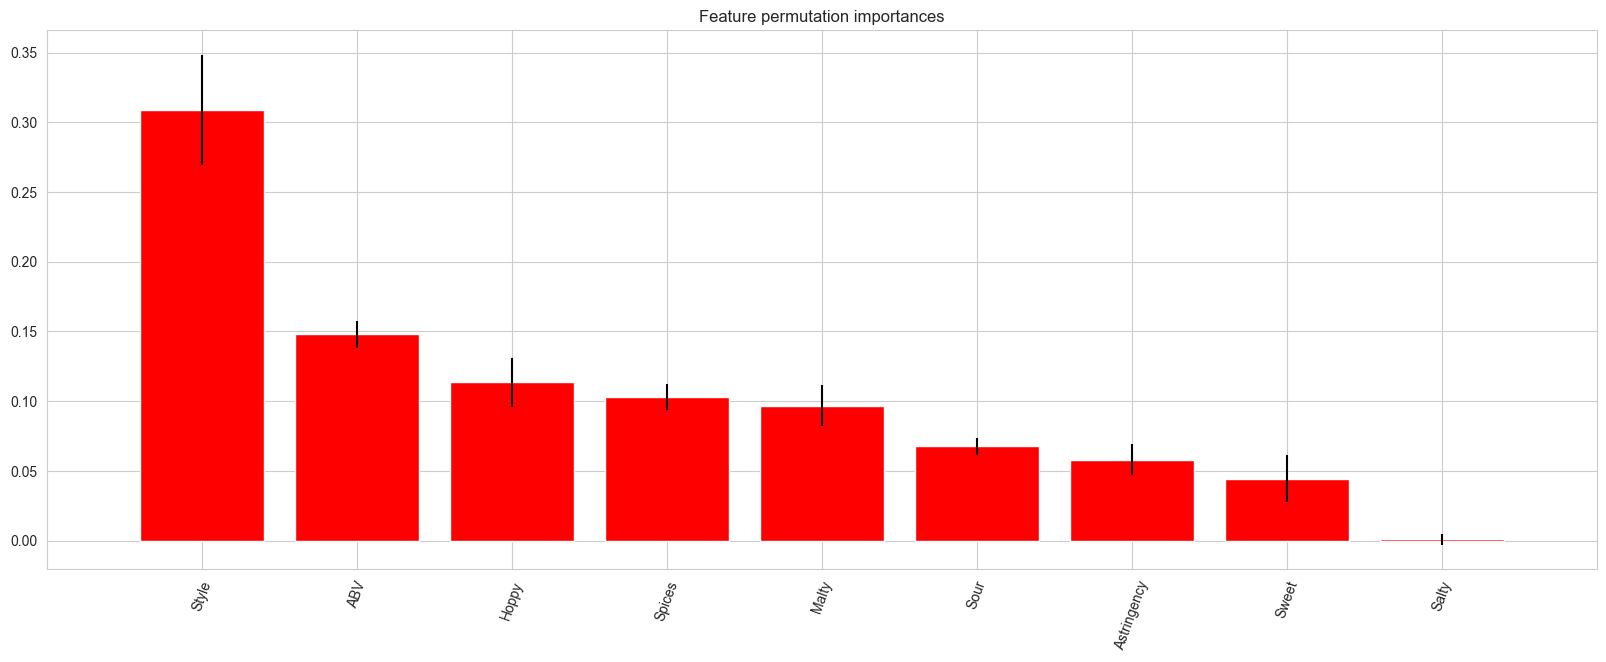

In [64]:
plot_permutation_importances(X_columns, importances, X_train, indices, std)